In [6]:
!pip install mplfinance
!pip install finta

In [7]:
!pip install mplfinance
!pip install yfinance

     |████████████████████████████████| 6.9 MB 11.2 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 3.4 MB/s  eta 0:00:01
  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8488 sha256=0a49b9db058ce0ac2489f53669025d3aef737cbe21108a6395f6001abed2cc5d
  Stored in directory: /home/gitpod/.cache/pip/wheels/21/c9/66/b41c847de65c7985db52ec21d59996841598b8b0e93f2b9500
Successfully built multitasking


In [8]:
import yfinance as yf, mplfinance as mpf, finta as fta, numpy as np, matplotlib.pyplot as plt
from finta import TA
slow = '20d'
fast = '8d'
efoi = yf.download('efoi',period='1y', interval='1d')
amd = yf.download('amd',period='1y',interval='1d')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

<Figure size 640x480 with 0 Axes>

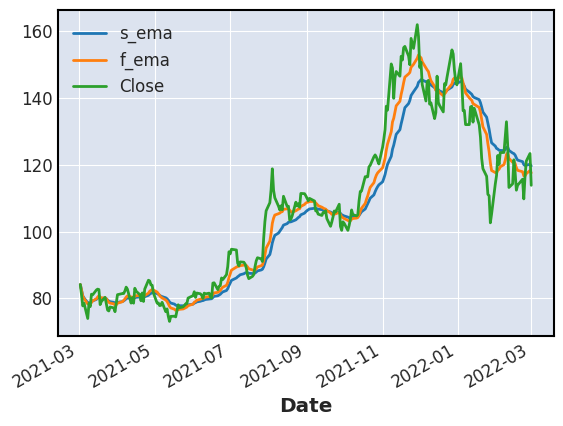

In [18]:
figure = plt.figure
amd['s_ema'] = TA.EMA(amd, 24)
amd['f_ema'] = TA.EMA(amd, 12)
amd['Signal'] = 0.0
amd['Signal'] = np.where(amd['s_ema'] > amd['f_ema'], 1.0, 0.0)
amd['Position'] = amd['Signal'].diff()
plt.savefig('lineplot.png')
amd[['s_ema','f_ema','Close']].plot.line()

In [ ]:
 amd['Signal'].diff()

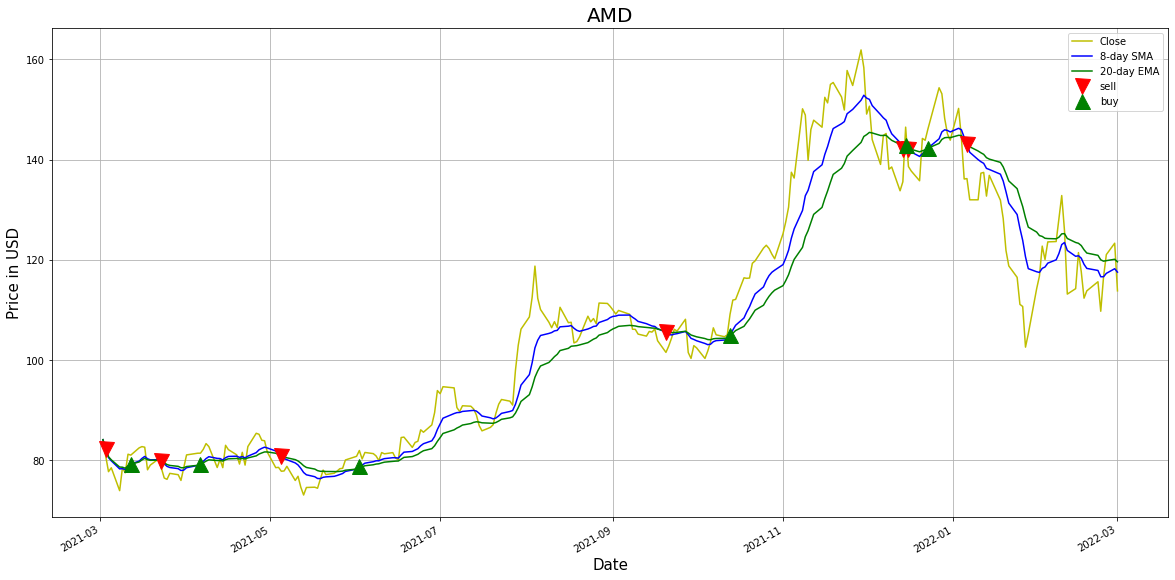

In [10]:
plt.figure(figsize = (20,10))
# plot Close, short-term and long-term moving averages 
amd['Close'].plot(color = 'y', label= 'Close') 
amd['f_ema'].plot(color = 'b',label = '8-day SMA') 
amd['s_ema'].plot(color = 'g', label = '20-day EMA')# plot ‘buy’ signals
plt.plot(amd[amd['Position'] == 1].index, 
         amd['f_ema'][amd['Position'] == 1], 
         'v', markersize = 15, color = 'r', label = 'sell')# plot ‘sell’ signals
plt.plot(amd[amd['Position'] == -1].index, 
         amd['f_ema'][amd['Position'] == -1], 
         '^', markersize = 15, color = 'g', label = 'buy')
plt.ylabel('Price in USD', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('AMD', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

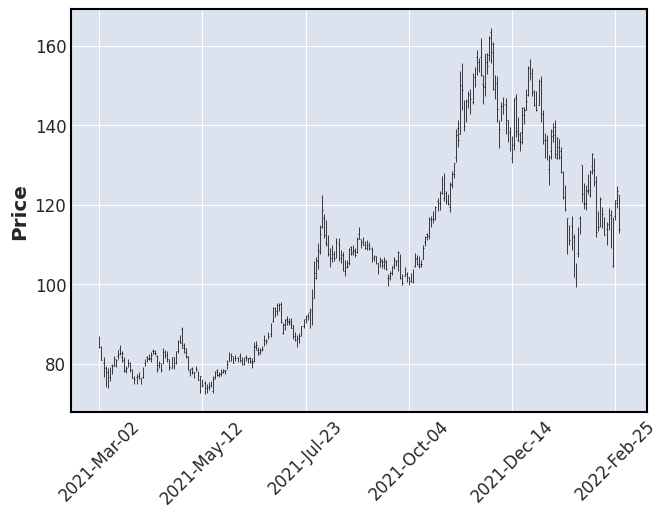

In [11]:
mpf.plot(amd)

In [15]:
amd[['BB_Upper','BB_Lower','Close']].plot.line()

KeyError: "['BB_Upper', 'BB_Lower'] not in index"

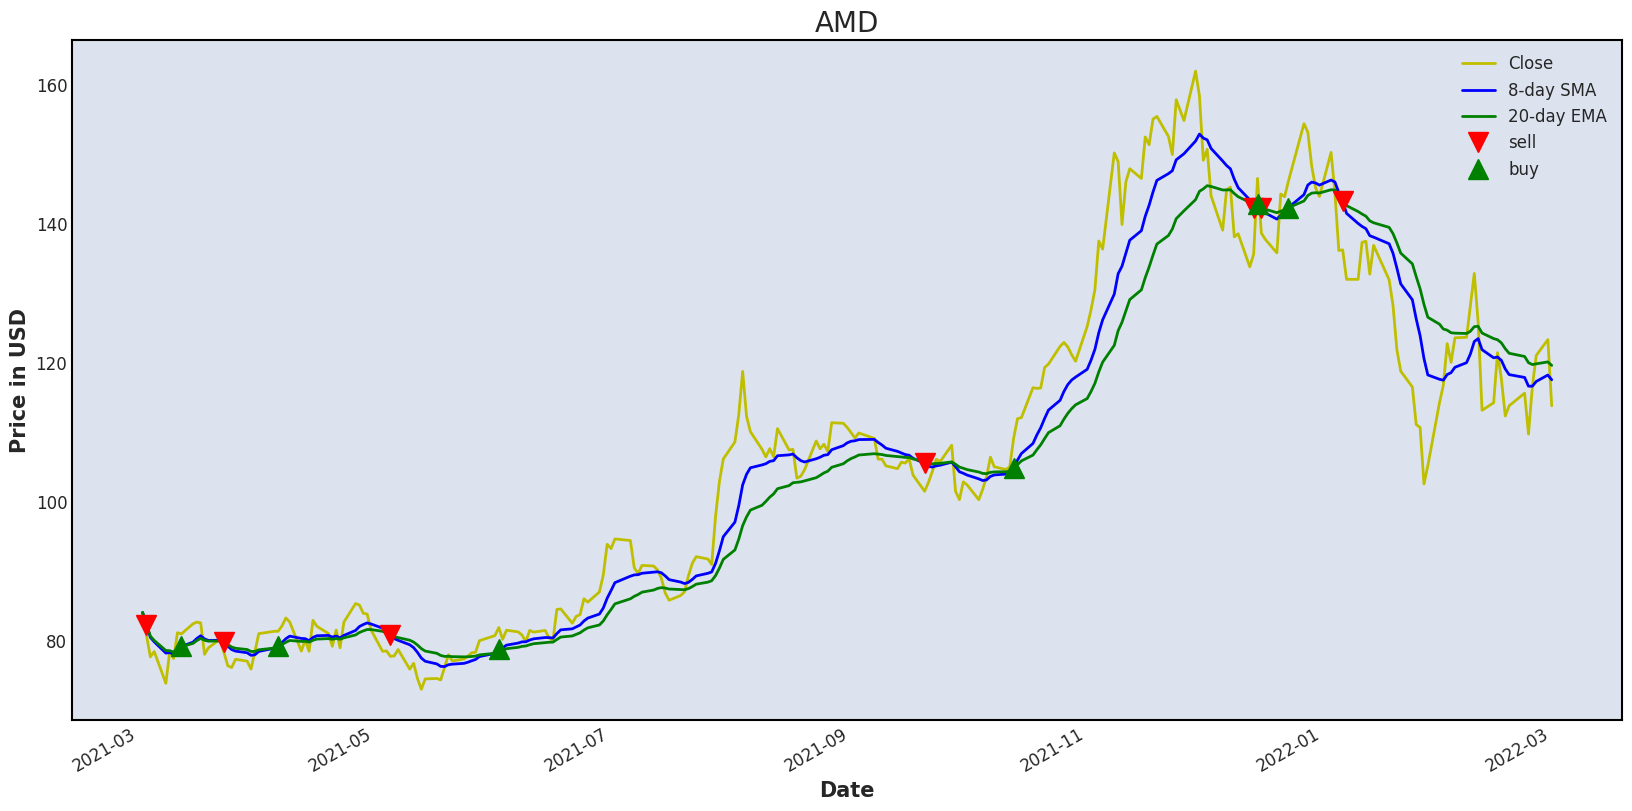

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize = (20,10))
# plot Close, short-term and long-term moving averages 
amd['Close'].plot(color = 'y', label= 'Close') 
amd['f_ema'].plot(color = 'b',label = '8-day SMA') 
amd['s_ema'].plot(color = 'g', label = '20-day EMA')# plot ‘buy’ signals
plt.plot(amd[amd['Position'] == 1].index, 
         amd['f_ema'][amd['Position'] == 1], 
         'v', markersize = 15, color = 'r', label = 'sell')# plot ‘sell’ signals
plt.plot(amd[amd['Position'] == -1].index, 
         amd['f_ema'][amd['Position'] == -1], 
         '^', markersize = 15, color = 'g', label = 'buy')
plt.ylabel('Price in USD', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('AMD', fontsize = 20)
plt.legend()
plt.grid()
plt.show()
plt.savefig('amd_ema_smaplot.png')